In [1]:
%load_ext autoreload
%autoreload 2

import sys

import lightkurve as lk

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile, LightCurve
from lightkurve.prf import StarPrior, BackgroundPrior, FocusPrior, MotionPrior, TPFModel, PRFPhotometry

from oktopus import GaussianPrior, UniformPrior

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.utils.data import get_pkg_data_filename


In [2]:
lk

<module 'lightkurve' from '/Users/ssagear/github/lightkurve/src/lightkurve/__init__.py'>

In [3]:
# tpf.inject() in targetpixelfile.py --> KeplerTargetPixelFile

In [4]:
tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/0084/008462852/"
                            "kplr008462852-2013098041711_lpd-targ.fits.gz", quality_mask='hardest')

In [5]:
lk

<module 'lightkurve' from '/Users/ssagear/github/lightkurve/src/lightkurve/__init__.py'>

In [8]:
dir(tpf)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_aperture_photometry',
 '_estimate_centroids_via_moments',
 '_estimate_centroids_via_quadratic',
 '_hdu',
 '_parse_aperture_mask',
 '_resolve_default_aperture_mask',
 '_to_matplotlib_animation',
 'animate',
 'astropy_time',
 'cadenceno',
 'campaign',
 'channel',
 'column',
 'create_threshold_mask',
 'cutout',
 'dec',
 'estimate_background',
 'estimate_centroids',
 'extract_aperture_photometry',
 'extract_prf_photometry',
 'flux',
 'flux_bkg',
 'f

In [9]:
tpf.flux[0].shape

(11, 11)

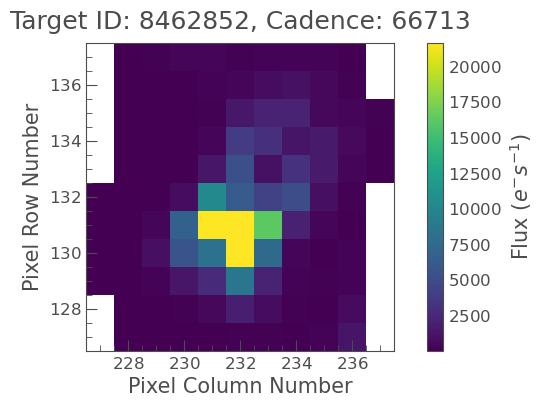

In [10]:
tpf.plot()
plt.show()

In [11]:
len(tpf.time)

3540

In [12]:
# Taking coords from the tpf object
c = SkyCoord(tpf.ra, tpf.dec, unit="deg")

In [64]:
import batman

time  = tpf.time.value

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.5                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model


m = batman.TransitModel(params, time)    #initializes model
flux = m.light_curve(params)  

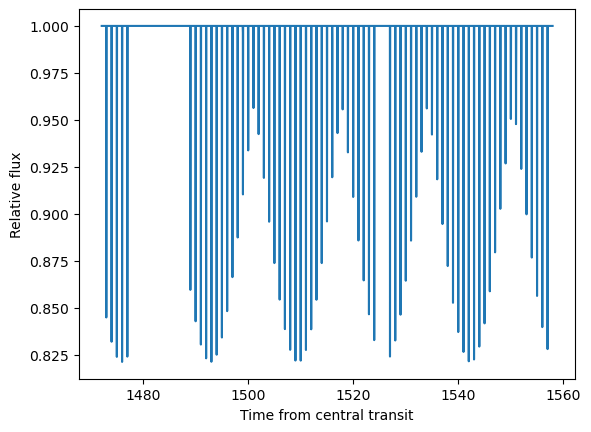

In [66]:
plt.plot(time, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

In [67]:
# Injecting the time series into PRF frames defined by TPF coords.
# Returns flux array (should return new TPF object in the future)
# Do we need to require coordinates to be input, if you must define a TPF
# object anyway?

tpf.inject(c, flux)

 15%|█▍        | 520/3540 [00:37<03:20, 15.06it/s]

In [51]:
tpf.flux_injected

[array([[            nan, -5.74946070e+00, -1.13220179e+00,
          2.89678502e+00,  4.56786804e+01,  1.32226837e+02,
          1.00921448e+02,  5.04141960e+01,  2.01544144e+02,
          1.22487183e+03,             nan],
        [            nan,  3.17240925e+01,  3.02265759e+01,
          1.15167236e+02,  4.39167419e+02,  1.79775391e+03,
          7.19301819e+02,  1.54446487e+02,  7.99651718e+01,
          6.66418701e+02,             nan],
        [ 9.51571045e+01,  5.42663460e+01,  2.01943283e+02,
          1.31969739e+03,  2.69945044e+03,  8.53319824e+03,
          2.16784424e+03,  2.24716919e+02,  1.39809616e+02,
          1.98060379e+02,             nan],
        [ 4.54826546e+01,  7.67417068e+01,  9.25626953e+02,
          5.64646387e+03,  8.14215625e+03,  2.83645586e+04,
          7.46336035e+03,  3.59383057e+02,  9.19603195e+01,
          2.27183792e+02,             nan],
        [ 3.92078018e+01,  4.22375069e+01,  3.34656311e+02,
          6.76192334e+03,  5.13046367e+04,  

In [52]:
dir(tpf)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_aperture_photometry',
 '_estimate_centroids_via_moments',
 '_estimate_centroids_via_quadratic',
 '_hdu',
 '_parse_aperture_mask',
 '_resolve_default_aperture_mask',
 '_to_matplotlib_animation',
 'animate',
 'astropy_time',
 'cadenceno',
 'campaign',
 'channel',
 'column',
 'create_threshold_mask',
 'cutout',
 'dec',
 'estimate_background',
 'estimate_centroids',
 'extract_aperture_photometry',
 'extract_prf_photometry',
 'flux'

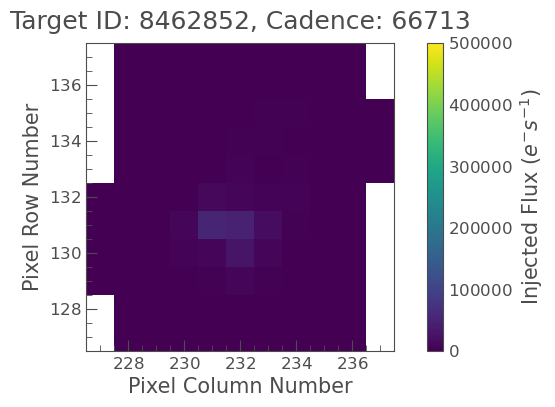

In [53]:
tpf.plot(column='INJECTED', frame=0, vmin=0, vmax=500000)
plt.show()

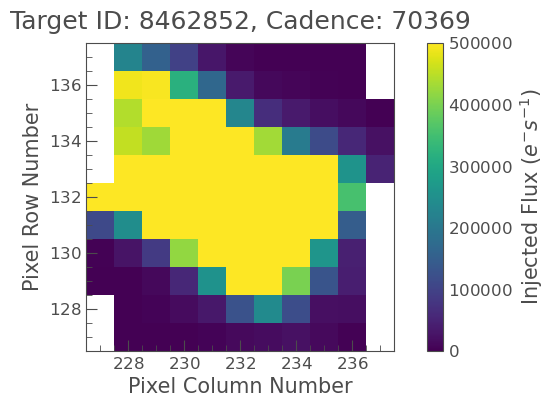

In [54]:
tpf.plot(column='INJECTED', frame=3000, vmin=0, vmax=500000)
plt.show()

In [55]:
tpf.animate(vmin=0, vmax=500000)

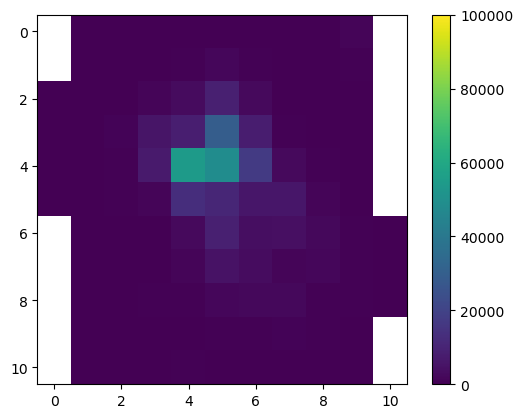

In [34]:
plt.imshow(new_tpfs[10], vmin=0, vmax=100000);
plt.colorbar();
plt.show()

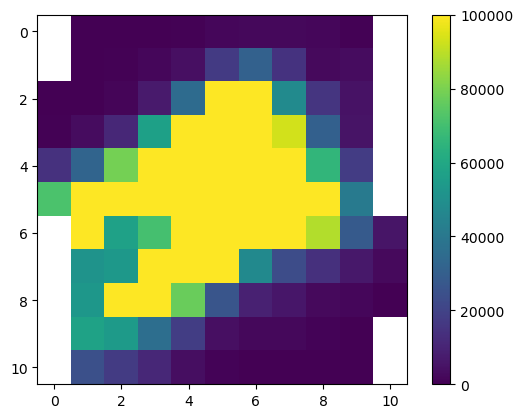

In [35]:
plt.imshow(new_tpfs[3500], vmin=0, vmax=100000);
plt.colorbar();
plt.show()

In [38]:
dir(tpf)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_aperture_photometry',
 '_estimate_centroids_via_moments',
 '_estimate_centroids_via_quadratic',
 '_hdu',
 '_parse_aperture_mask',
 '_resolve_default_aperture_mask',
 '_to_matplotlib_animation',
 'animate',
 'astropy_time',
 'cadenceno',
 'campaign',
 'channel',
 'column',
 'create_threshold_mask',
 'cutout',
 'dec',
 'estimate_background',
 'estimate_centroids',
 'extract_aperture_photometry',
 'extract_prf_photometry',
 'flux'